170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 14s 0us/step


<ipython-input-1-5f40073aead6>:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.title(class_names[int(y_train[i])])


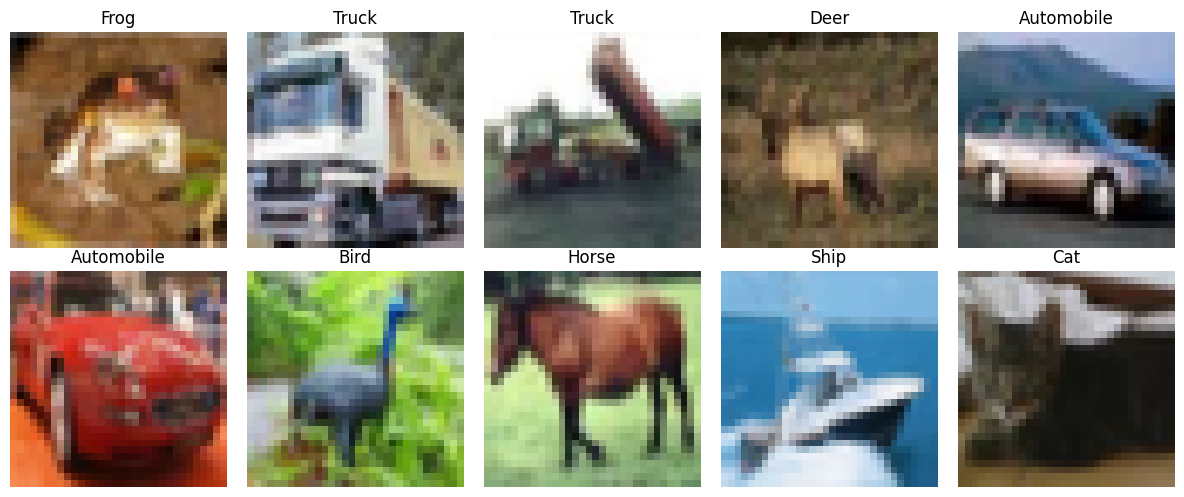

Number of classes: 10
Image shape: (32, 32, 3)
Number of training samples: 50000
Number of testing samples: 10000


In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[int(y_train[i])])
    plt.axis('off')
plt.tight_layout()
plt.show()

print("Number of classes:", len(np.unique(y_train)))
print("Image shape:", x_train[0].shape)
print("Number of training samples:", x_train.shape[0])
print("Number of testing samples:", x_test.shape[0])

In [ ]:
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

from tensorflow.keras.utils import to_categorical
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
datagen.fit(x_train)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))

model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,288,970 (16.36 MB)

 Trainable params: 4,288,970 (16.36 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 44ms/step - accuracy: 0.3470 - loss: 1.7815 - val_accuracy: 0.5791 - val_loss: 1.1698
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.5735 - loss: 1.1957 - val_accuracy: 0.6525 - val_loss: 0.9968
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.6390 - loss: 1.0112 - val_accuracy: 0.7139 - val_loss: 0.8149
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 38ms/step - accuracy: 0.6711 - loss: 0.9364 - val_accuracy: 0.7015 - val_loss: 0.8665
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 29s 37ms/step - accuracy: 0.6922 - loss: 0.8710 - val_accuracy: 0.7049 - val_loss: 0.8670
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7091 - loss: 0.8311 - val_accuracy: 0.7449 - val_loss: 0.7387
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 38ms/step - accuracy: 0.7215 - loss: 0.7977 - val_accuracy: 0.7331 - val_loss: 0.8018
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7330 - loss: 0.7608 - val_accurac

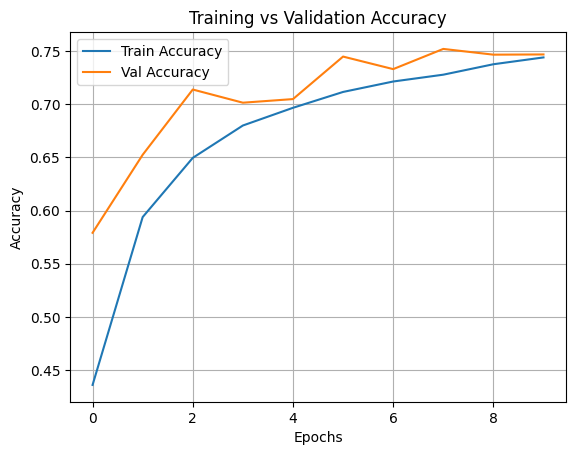

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                    epochs=10,
                    validation_data=(x_test, y_test_cat))

import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.title('Training vs Validation Accuracy')
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7483 - loss: 0.7783

Test Accuracy: 74.69%
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


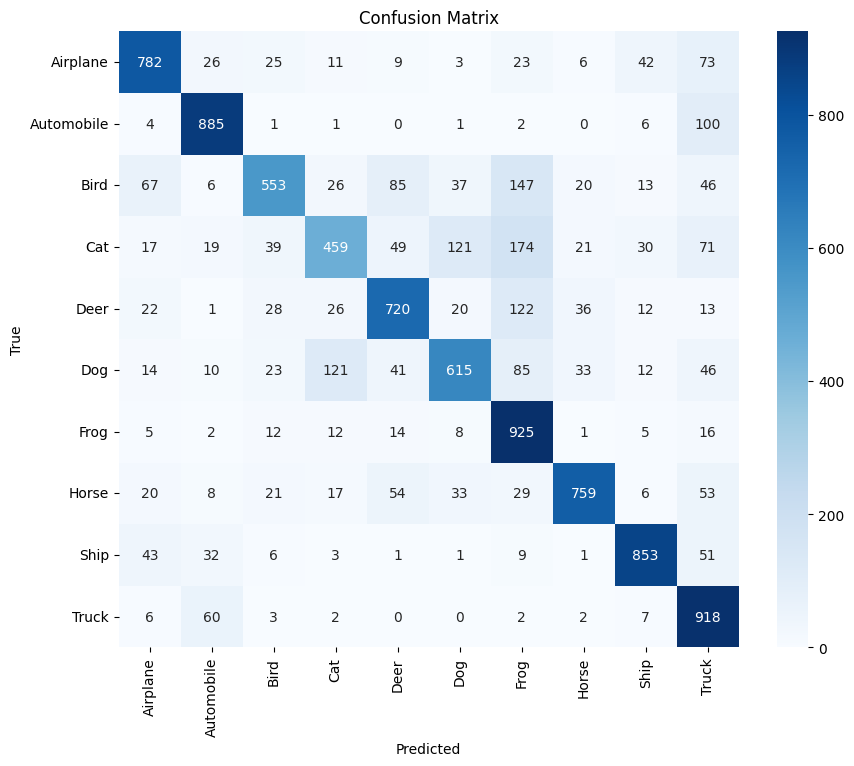


Classification Report:
              precision    recall  f1-score   support

    Airplane       0.80      0.78      0.79      1000
  Automobile       0.84      0.89      0.86      1000
        Bird       0.78      0.55      0.65      1000
         Cat       0.68      0.46      0.55      1000
        Deer       0.74      0.72      0.73      1000
         Dog       0.73      0.61      0.67      1000
        Frog       0.61      0.93      0.73      1000
       Horse       0.86      0.76      0.81      1000
        Ship       0.87      0.85      0.86      1000
       Truck       0.66      0.92      0.77      1000

    accuracy                           0.75     10000
   macro avg       0.76      0.75      0.74     10000
weighted avg       0.76      0.75      0.74     10000



In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f"\nTest Accuracy: {test_acc*100:.2f}%")

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = y_test.flatten()

conf_matrix = confusion_matrix(y_true, y_pred_classes)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_true, y_pred_classes, target_names=class_names))

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_cnn_model.h5', save_best_only=True)

history_bonus = model.fit(datagen.flow(x_train, y_train_cat, batch_size=64),
                          epochs=20,
                          validation_data=(x_test, y_test_cat),
                          callbacks=[early_stop, checkpoint])

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.7502 - loss: 0.7097

782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 48ms/step - accuracy: 0.7502 - loss: 0.7097 - val_accuracy: 0.7594 - val_loss: 0.7160
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7583 - loss: 0.6960 - val_accuracy: 0.7597 - val_loss: 0.7191
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 40ms/step - accuracy: 0.7590 - loss: 0.6782 - val_accuracy: 0.7567 - val_loss: 0.7215
Epoch 4/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7617 - loss: 0.6778

782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7618 - loss: 0.6778 - val_accuracy: 0.7686 - val_loss: 0.6858
Epoch 5/20
781/782 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7690 - loss: 0.6586

782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7690 - loss: 0.6586 - val_accuracy: 0.7744 - val_loss: 0.6741
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7744 - loss: 0.6472 - val_accuracy: 0.7772 - val_loss: 0.6792
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 31s 39ms/step - accuracy: 0.7751 - loss: 0.6354 - val_accuracy: 0.7725 - val_loss: 0.6759
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 30s 39ms/step - accuracy: 0.7802 - loss: 0.6224 - val_accuracy: 0.7757 - val_loss: 0.6866
